## Classification of Breast Cancer Tumours

This project aims to build a classification model to predict if a tumour is benign or malignant. In this notebook, 4 different classification models (Decision Tree, Random Forest, Logistic Regression, Support Vector Machines) would be examined to determine which is the best model to use for prediction.

The dataset was retrieved from Kaggle: https://www.kaggle.com/yasserh/breast-cancer-dataset?select=breast-cancer.csv

In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [352]:
# import dataset
data = pd.read_csv("breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [353]:
data.shape

(569, 32)

In [354]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [355]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [356]:
# check for null values
data[data.isna().any(axis=1)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


Set M = 1, B = 0

In [357]:
data['diagnosis'].replace({'M':1, 'B':0}, inplace=True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [358]:
int_col = ['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']
int_col

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

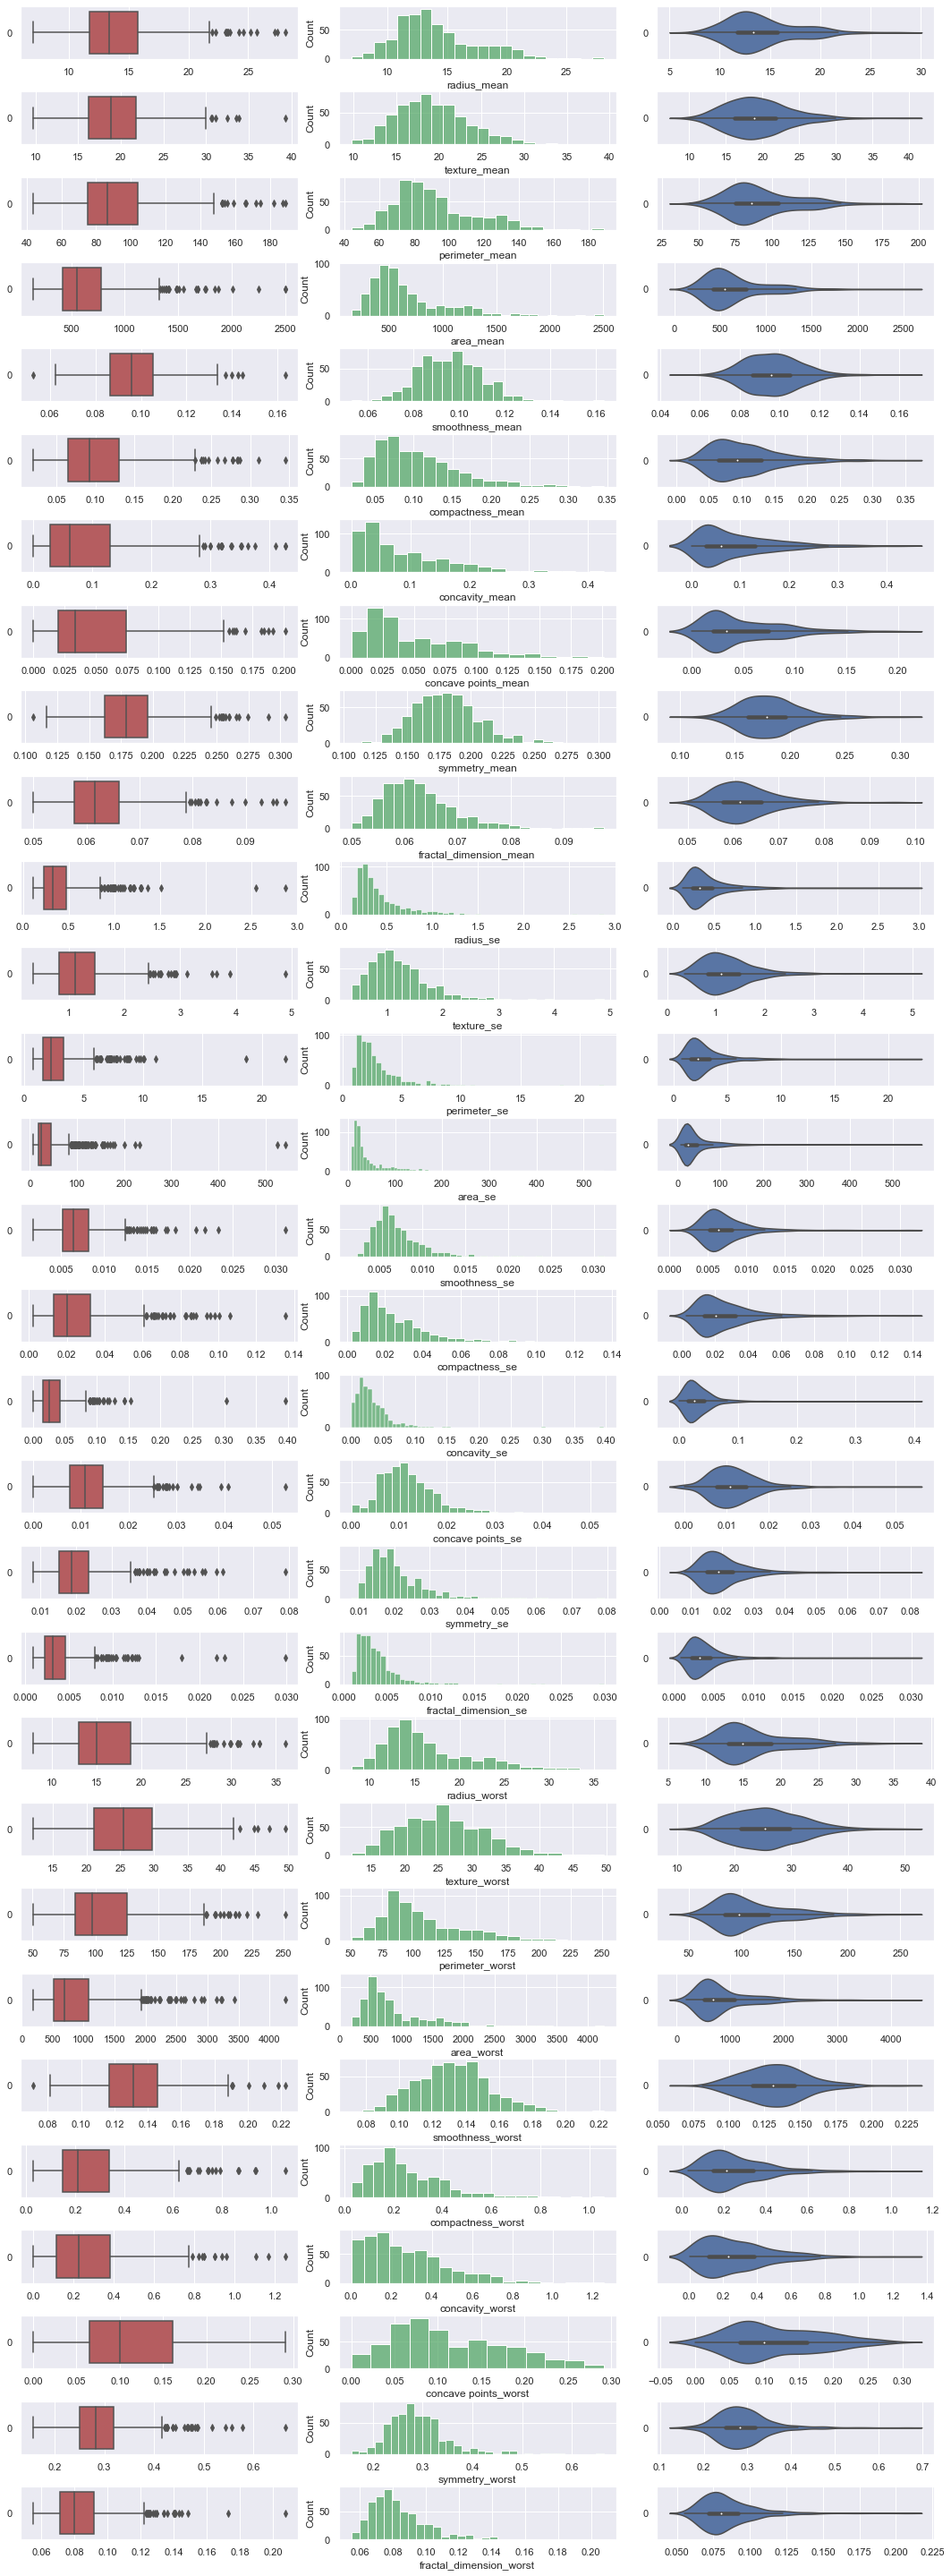

In [359]:
# Draw the distributions of all variables
fig, axes = plt.subplots(len(int_col), 3, figsize=(15,40))
fig.tight_layout()

count = 0
for var in data[int_col]:
    sb.boxplot(data=data[var], orient = 'h', ax = axes[count,0], color = 'r')
    sb.histplot(data =data[var], ax = axes[count,1], color = 'g')
    sb.violinplot(data = data[var], orient = 'h', ax = axes[count,2], color = 'b')
    count += 1

0    357
1    212
Name: diagnosis, dtype: int64 

Ratio of B : M is 
357 : 212
or  1.6839622641509433


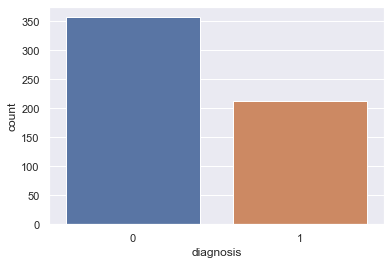

In [360]:
# count M vs B
countseries = data['diagnosis'].value_counts()
sb.countplot(x = 'diagnosis', data = data)
print(countseries, '\n')

B = countseries[0]
M = countseries[1]
print('Ratio of B : M is ')
print(B, ':', M)
print('or ', B/M)


### Decision Tree Classification Model

Train and inspect accuracy of Decision Tree Classifier

In [361]:
from sklearn.tree import DecisionTreeClassifier

# set target and features
target = data['diagnosis']
features = data[int_col] #all integer columns used as features

Optimal number of features : 4
[False False False False False False False False False False False False
 False False False False False False False False  True  True False False
  True False False  True False False]


/Users/euchunkang/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


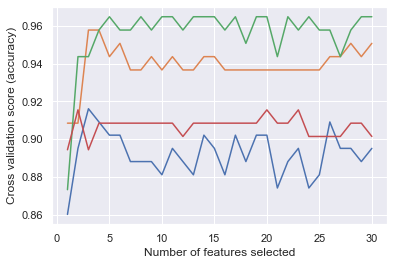

RFECV(cv=4, estimator=DecisionTreeClassifier(max_depth=5), scoring='accuracy')


In [362]:
# use RFECV to select features

# Create the RFE object and compute a cross-validated score.
dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=dectree,
    step=1,
    cv=4,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(features, target)

print("Optimal number of features : %d" % rfecv.n_features_)
select_features = rfecv.support_
print(select_features)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()
print(rfecv)

In [363]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(data[DT_features], target, test_size = 0.25)

In [364]:
# Decision Tree using Train Data
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=5)

In [365]:
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9906103286384976

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9370629370629371



<AxesSubplot:>

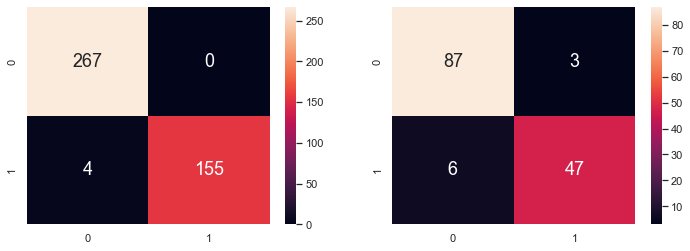

In [366]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
con_mat_train = confusion_matrix(y_train, y_train_pred)
con_mat_test = confusion_matrix(y_test, y_test_pred)
sb.heatmap(con_mat_train,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(con_mat_test, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [367]:
DT_f1 = f1_score(y_test, y_test_pred)
DT_f1

0.912621359223301

### Random Forest Classifier

Train and inspect accuracy of Random Forest Classifier

In [368]:
from sklearn.ensemble import RandomForestClassifier

Optimal number of features : 21
[ True  True False  True False False  True  True  True False  True False
  True  True False  True  True False  True False  True  True  True  True
 False  True  True  True  True  True]


/Users/euchunkang/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


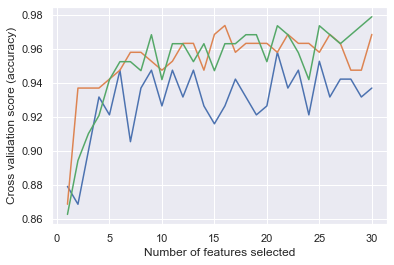

Index(['radius_mean', 'texture_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concavity_se', 'symmetry_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [369]:
RF = RandomForestClassifier(n_estimators=10)

# use RFECV to select features

# Create the RFE object and compute a cross-validated score.
dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=RF,
    step=1,
    cv=3,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(features, target)

print("Optimal number of features : %d" % rfecv.n_features_)
select_features = rfecv.support_
print(select_features)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

RF_features = features.loc[:, select_features == True].columns
print(RF_features)

In [370]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(data[RF_features], target, test_size = 0.25)

In [371]:
#fit model
RF.fit(X_train, y_train)

# Predict Response corresponding to Predictors
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9953051643192489

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.958041958041958



<AxesSubplot:>

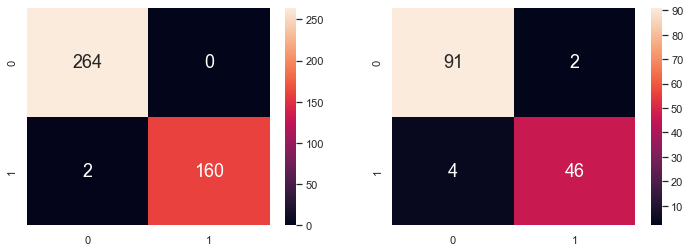

In [372]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", RF.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", RF.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
con_mat_train = confusion_matrix(y_train, y_train_pred)
con_mat_test = confusion_matrix(y_test, y_test_pred)
sb.heatmap(con_mat_train,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(con_mat_test, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [373]:
RF_f1 = f1_score(y_test, y_test_pred)
RF_f1

0.9387755102040817

## Logistic Regression 

Train and inspect accuracy of Logistic Regression 

Optimal number of features : 24
[ True  True  True False  True  True  True  True  True  True False  True
 False  True False False  True  True  True False  True  True  True  True
  True  True  True  True  True  True]


/Users/euchunkang/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


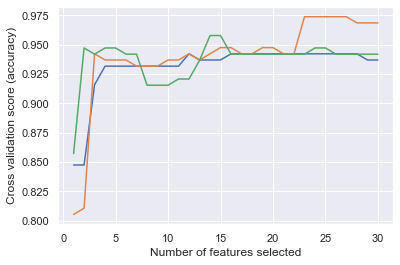

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'concavity_se', 'concave points_se', 'symmetry_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [374]:
from sklearn.linear_model import LogisticRegression

# use RFECV to select features

# Create the RFE object and compute a cross-validated score.
logreg = LogisticRegression(solver='liblinear')

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=logreg,
    step=1,
    cv=3,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(features, target)

print("Optimal number of features : %d" % rfecv.n_features_)
select_features = rfecv.support_
print(select_features)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

logreg_features = features.loc[:, select_features == True].columns
print(logreg_features)

In [375]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(data[logreg_features], target, test_size = 0.25)

In [376]:
#fit model
logreg.fit(X_train, y_train)

# Predict Response corresponding to Predictors
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.960093896713615

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.965034965034965



<AxesSubplot:>

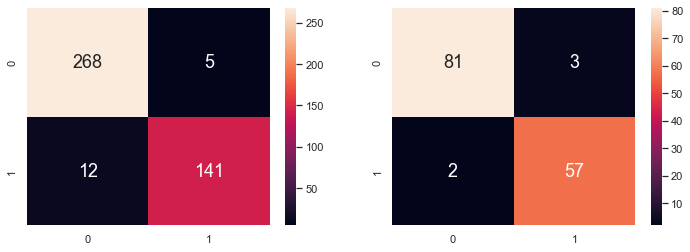

In [377]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", logreg.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", logreg.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
con_mat_train = confusion_matrix(y_train, y_train_pred)
con_mat_test = confusion_matrix(y_test, y_test_pred)
sb.heatmap(con_mat_train,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(con_mat_test, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [378]:
logreg_f1 = f1_score(y_test, y_test_pred)
logreg_f1

0.957983193277311

## Support Vector Machines

Train and inspect accuracy of SVC

Optimal number of features : 12
[ True False False False False  True  True  True  True False False  True
 False False False False False False False False  True False False False
  True  True  True  True  True False]


/Users/euchunkang/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


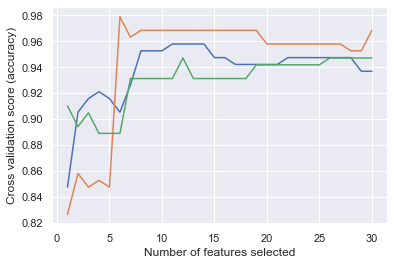

Index(['radius_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'texture_se', 'radius_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')


In [379]:
from sklearn.svm import SVC

#linear kernel
svc_linear = SVC(kernel='linear')

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc_linear,
    step=1,
    cv=3,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(features, target)

print("Optimal number of features : %d" % rfecv.n_features_)
select_features = rfecv.support_
print(select_features)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

svc_linear_features = features.loc[:, select_features == True].columns
print(svc_linear_features)

In [380]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(data[svc_linear_features], target, test_size = 0.25)

In [381]:
#fit model
svc_linear.fit(X_train, y_train)

# Predict Response corresponding to Predictors
y_train_pred = svc_linear.predict(X_train)
y_test_pred = svc_linear.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9671361502347418

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9440559440559441



<AxesSubplot:>

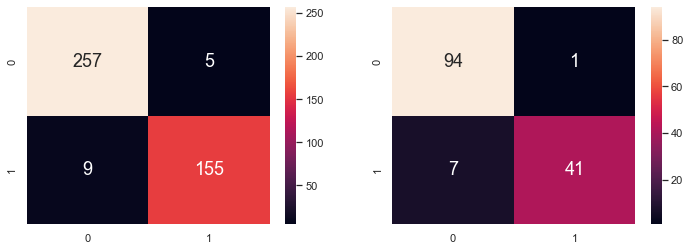

In [382]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", svc_linear.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", svc_linear.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
con_mat_train = confusion_matrix(y_train, y_train_pred)
con_mat_test = confusion_matrix(y_test, y_test_pred)
sb.heatmap(con_mat_train,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(con_mat_test, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [383]:
svc_linear_f1 = f1_score(y_test, y_test_pred)
svc_linear_f1

0.9111111111111111

In [384]:
# radial kernel
svc_rbf = SVC()

In [385]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25)

In [386]:
#fit model
svc_rbf.fit(X_train, y_train)

# Predict Response corresponding to Predictors
y_train_pred = svc_rbf.predict(X_train)
y_test_pred = svc_rbf.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9154929577464789

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9300699300699301



<AxesSubplot:>

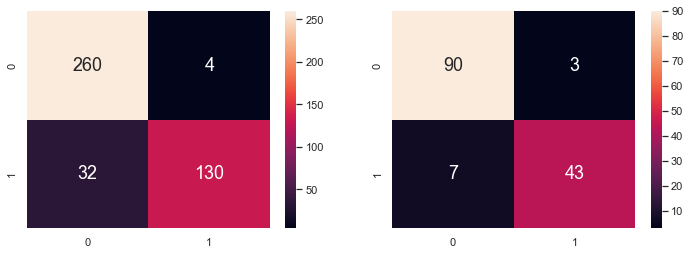

In [387]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", svc_rbf.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", svc_rbf.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
con_mat_train = confusion_matrix(y_train, y_train_pred)
con_mat_test = confusion_matrix(y_test, y_test_pred)
sb.heatmap(con_mat_train,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(con_mat_test, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [389]:
svc_rbf_f1 = f1_score(y_test, y_test_pred)
svc_rbf_f1

0.8958333333333334

In [398]:
f1_df = pd.DataFrame({'Model':['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM (linear)', 'SVM (radial)'], 'f1 Score':[DT_f1, RF_f1, logreg_f1, svc_linear_f1, svc_rbf_f1]}, )
f1_df

,Model,f1 Score
0,Decision Tree,0.912621
1,Random Forest,0.938776
2,Logistic Regression,0.957983
3,SVM (linear),0.911111
4,SVM (radial),0.895833


Overall, all the models had relatively high accuracies in predicting whether the tumour was benign or malignant. All the models had f1 scores of close to 90 or more. From the f1 scores, the two SVM models have the lowest accuracies. Logistic Regression appears to have the highest f1 score of 0.958. Thus, I would pick the Logistic Regression model to be used for predictions. Alternatively, an average of the predictions from all the models could be used, where the most predicted class among the 5 models is accepted as the final prediction.

This dataset only had 569 rows of data, and is a relatively small dataset. The computational cost was thus not obvious for more complex models like Random Forest. 

In this notebook, what could be improved would be looking at minimising the False Negatives Rate. For detecting cancerous tumours, it is better for the model to predict False Positives to be safe. It is highly undesirable for False Negative predictions as delayed treatment for cancerous tumours could pose huge health risks. 